**Tensorflowun Yüklenmesi**

In [1]:
!pip install tensorflow
!pip install pandas

**Gerekli Kütüphanelerin Yüklenmesi**
Yüklenen Kütüphaneler:
1)Tensorflow ve Keras
2)Sequential Model
3)Dense Ve Flatten Katmanları
4)to_categorical
5)NumPy
6)Matplotlib
7)train_test_split
8)warnings

In [2]:

import tensorflow as tf 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
import numpy as np  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split  
import warnings  


**Veri Ön işlemenin Yapılması**
Bu kod, belirtilen dizinde bulunan alt dizinleri listeleyerek görüntüler. Bu tür bir işlem, sınıflandırma problemlerinde veri setinin yapısını anlamak için yararlıdır

In [3]:
import os


directory = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'

classes = [i for i in os.listdir(directory) if '.' not in i]

print("Sınıflar:", classes)


Sınıflar: ['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']


Bu kod, belirli bir dizinde yer alan .png uzantılı dosyaların yollarını ve etiketlerini toplayarak bir pandas DataFrame oluşturur. GT isimli dizin atlanır.

In [4]:
import os
import pandas as pd

label = []
path = []


for dir_name, _, filenames in os.walk(directory): 
    if dir_name.split()[-1] != 'GT': 
        for filename in filenames:
            if os.path.splitext(filename)[-1] == '.png': 
                label.append(os.path.split(dir_name)[-1]) 
                path.append(os.path.join(dir_name, filename)) 


data = pd.DataFrame(columns=['path', 'label'])
data['path'] = path
data['label'] = label


print(data)

                                                   path            label
0     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
1     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
2     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
3     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
4     /kaggle/input/a-large-scale-fish-dataset/Fish_...  Hourse Mackerel
...                                                 ...              ...
8995  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8996  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8997  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8998  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream
8999  /kaggle/input/a-large-scale-fish-dataset/Fish_...    Red Sea Bream

[9000 rows x 2 columns]


pandas DataFrame'inin data isimli bir nesnesindeki path sütunundaki ilk elemanı (yani ilk satırını) almak için kullanılır.

In [5]:
data.path[0]

'/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset/Hourse Mackerel/Hourse Mackerel/00929.png'

data.label.value_counts() ifadesi, pandas DataFrame'inin label sütunundaki her bir sınıfın kaç kez tekrarlandığını sayar ve bu sayıları bir pandas Series olarak döndürür.

In [6]:
data.label.value_counts()

label
Hourse Mackerel       1000
Black Sea Sprat       1000
Sea Bass              1000
Red Mullet            1000
Trout                 1000
Striped Red Mullet    1000
Shrimp                1000
Gilt-Head Bream       1000
Red Sea Bream         1000
Name: count, dtype: int64

**Sınıf Dağılımının Görselleştirilmesi**
matplotlib.pyplot: Grafik çiziminde kullanılan temel kütüphane.
seaborn: Matplotlib tabanlı daha estetik ve kolay grafikler çizen bir kütüphane.
En başta bunlar import edilir.
plt.figure(figsize=(12, 6)): Oluşturulan grafiğin boyutunu belirler. Burada genişlik 12 inç ve yükseklik 6 inç olarak ayarlandı.
ns.countplot: Seaborn kütüphanesindeki bir fonksiyon, belirli bir sütundaki benzersiz değerlerin sayısını çubuk grafik olarak çizer.
data=data: Kullanılacak veri kümesini belirtir.
x='label': X ekseninde kullanılacak sütun. Burada sınıflar (label) kullanılır.
order=data['label'].value_counts().index: Sınıf dağılımının sıralı bir şekilde (en çoktan en aza) gösterilmesi için kullanılır.
plt.xticks(rotation=45): X eksenindeki etiketlerin 45 derece döndürülerek daha okunabilir hale getirilmesini sağlar.
plt.title('Sınıf Dağılımı'): Grafiğe bir başlık ekler.
plt.xlabel('Sınıf'): X ekseninin etiketini ayarlar.
plt.ylabel('Örnek Sayısı'): Y ekseninin etiketini ayarlar.
plt.show(): Oluşturulan grafiği ekranda gösterir.


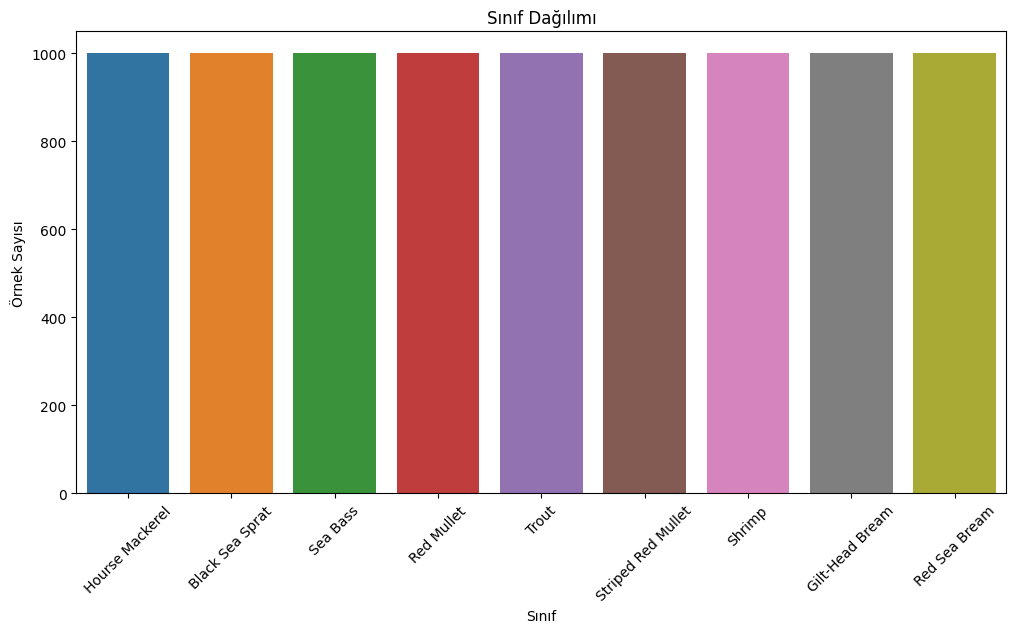

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(12, 6))
sns.countplot(data=data, x='label', order=data['label'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Sınıf Dağılımı')
plt.xlabel('Sınıf')
plt.ylabel('Örnek Sayısı')
plt.show()

**Eğitim Ve Test Setlerine Ayırma**
X değişkeni, modelin girdi verilerini (özelliklerini) temsil eder. Burada, data veri çerçevesinde bulunan dosya yollarını (muhtemelen resim veya başka dosyaların yolları) alır.
y değişkeni ise modelin tahmin etmeye çalıştığı hedef değişkeni temsil eder. 
train_test_split fonksiyonu, girdi (X) ve hedef (y) verilerini eğitim ve test setlerine ayırır.
test_size=0.2: Verilerin %20'sinin test seti olarak ayrılacağını belirtir. Geri kalan %80 ise eğitim seti olacaktır.
random_state=42: Veri setinin bölünmesinin her seferinde aynı sonucu vermesi için rastgelelikte bir tohum (seed) belirler. Bu, sonuçların tekrarlanabilirliğini sağlar.
stratify=y: Bu parametre, her sınıfın orantılı bir şekilde eğitim ve test setlerine dağıtılmasını sağlar.
print(f"Eğitim seti boyutu: {len(X_train)}")
print(f"Test seti boyutu: {len(X_test)}")  Eğitim ve test setlerinin boyutlarını ekrana yazdırır.

In [8]:
from sklearn.model_selection import train_test_split


X = data['path']
y = data['label'] 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


print(f"Eğitim seti boyutu: {len(X_train)}")
print(f"Test seti boyutu: {len(X_test)}")


Eğitim seti boyutu: 7200
Test seti boyutu: 1800


**Görüntüleri Yükleme Ve Ön İşleme**
os: Dosya ve dizin işlemleri için kullanılır.
pandas: Veri analizi için kullanılır, özellikle veri çerçeveleri oluşturmak ve yönetmek için.
tensorflow: Makine öğrenimi ve derin öğrenme kütüphanesi.
img_to_array, load_img: Keras görüntü işleme fonksiyonlarıdır; görüntüleri yüklemek ve numpy dizilerine dönüştürmek için kullanılır.
LabelEncoder: Kategorik etiketleri tam sayılara dönüştürmek için kullanılır.
Görüntülerin model tarafından kullanılacak boyutları 224x224 piksel olarak ayarlandı.
LabelEncoder, y_train'deki etiketleri tam sayılara dönüştürmek için kullanılır.
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    return img_array bu fonksiyon ile:
    Bu fonksiyon, verilen bir dosya yolunu alır, görüntüyü yükler, belirtilen boyutlara (224x224) yeniden boyutlandırır, numpy dizisine dönüştürür ve 0-1 aralığına normalleştirir (piksel değerleri 255 ile bölünerek).
def process_path(file_path, label):
    img = load_and_preprocess_image(file_path.numpy().decode('utf-8'))
    return img, tf.cast(label, tf.int32) Bu fonksiyon ise dosya yolu ve etiket alır, görüntüyü yükleyip işler ve etiketin veri tipini int32'ye dönüştürür.
    def create_dataset(file_paths, labels, batch_size=32):
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    dataset = dataset.map(lambda x, y: tf.py_function(process_path, [x, y], [tf.float32, tf.int32]), num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.shuffle(buffer_size=len(file_paths))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)
    return dataset Bu fonksiyon, dosya yolları ve etiketlerden bir TensorFlow veri kümesi oluşturur.
    Eğitim ve test setleri için  tanımlanan create_dataset fonksiyonu çağrılarak veri kümeleri oluşturulur.




In [9]:
import os
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from sklearn.preprocessing import LabelEncoder


IMG_HEIGHT, IMG_WIDTH = 224, 224


label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y_train) 


def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(IMG_HEIGHT, IMG_WIDTH)) 
    img_array = img_to_array(img)  
    img_array = img_array / 255.0 
    return img_array


def process_path(file_path, label):
    img = load_and_preprocess_image(file_path.numpy().decode('utf-8'))
    return img, tf.cast(label, tf.int32)  


def create_dataset(file_paths, labels, batch_size=32):
    
    dataset = tf.data.Dataset.from_tensor_slices((file_paths, labels))
    
    
    dataset = dataset.map(lambda x, y: tf.py_function(process_path, [x, y], [tf.float32, tf.int32]),
                          num_parallel_calls=tf.data.AUTOTUNE)
    
  
    dataset = dataset.shuffle(buffer_size=len(file_paths))
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(tf.data.AUTOTUNE)  
    return dataset


train_dataset = create_dataset(X_train, y_encoded) 
test_dataset = create_dataset(X_test, y_test)       


for images, labels in train_dataset.take(1):  
    print(images.shape, labels.shape)  


(32, 224, 224, 3) (32,)


**Görüntülerin Yüklenmesi**
plt.figure ile bir grafik penceresi oluşturulur. figsize=(10, 10) parametresi, grafiğin boyutunu 10x10 inç olarak ayarlar.
for döngüsü, data veri çerçevesinin ilk 9 görüntüsünü ve etiketini işlemekte kullanılır
img_path, data veri çerçevesinin path sütunundan görüntü yolunu alır.
label, aynı veri çerçevesinin label sütunundan görüntüye karşılık gelen etiketi alır.
load_img: Belirtilen dosya yolundan görüntüyü yükler ve belirtilen boyut (224x224) ile yeniden boyutlandırır.
img_to_array: Yüklenen görüntüyü bir numpy dizisine çevirir.
/ 255.0: Piksel değerlerini 0 ile 1 arasına normalleştirir, bu da modelin daha iyi performans göstermesine yardımcı olur.
plt.subplot(3, 3, i+1): 3 satır ve 3 sütundan oluşan bir ızgara oluşturur ve i+1 ile her bir alt grafiğe karşılık gelen konumu ayarlar. 
plt.imshow(img_array): Önceden işlenmiş görüntüyü alt grafikte gösterir.
plt.title(f'Label: {label}'): Alt grafiğin başlığını, ilgili etiket ile ayarlar. f'Label: {label}' ifadesi, başlıkta etiketin görüntülenmesini sağlar.
plt.axis('off'): Eksenleri kapatır, böylece sadece görüntü ve başlık görünür.
plt.tight_layout(): Alt grafiklerin arasındaki boşlukları otomatik olarak ayarlar, böylece görüntüler ve başlıklar düzgün bir şekilde hizalanır.
plt.show(): Oluşturulan grafiği ekranda gösterir.


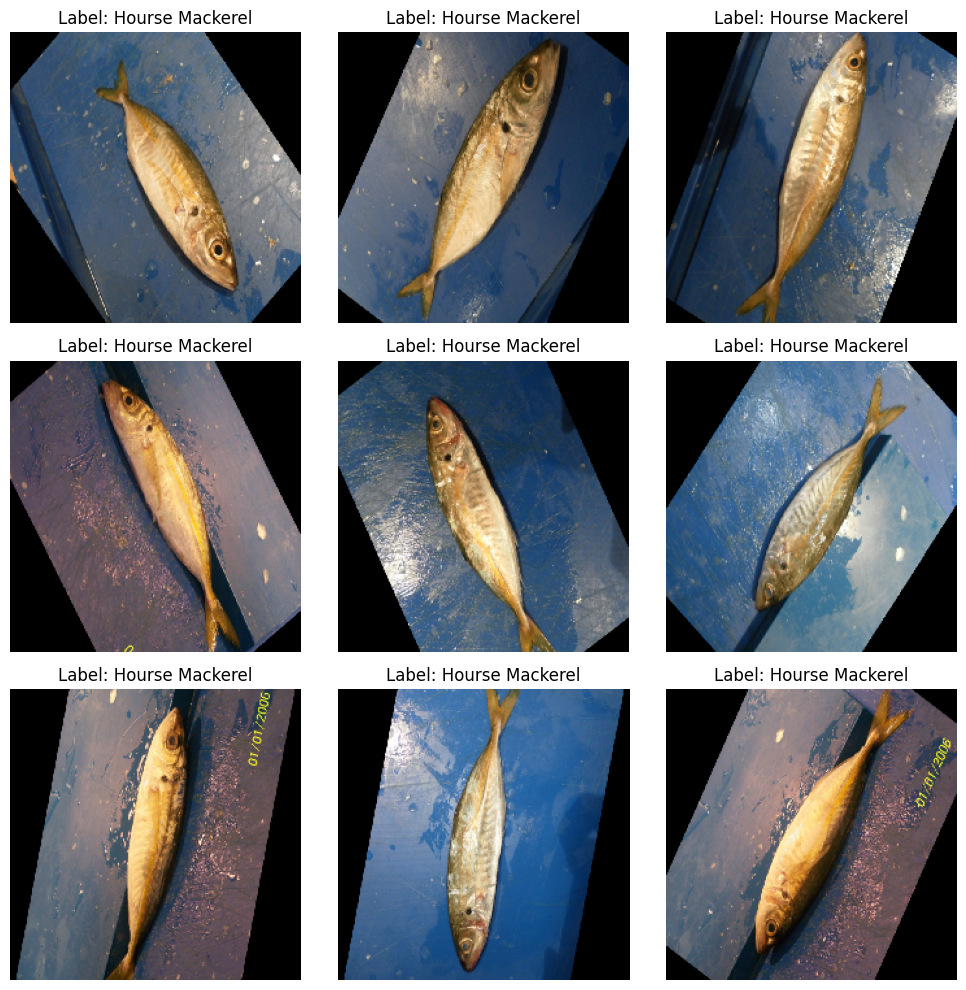

In [10]:
plt.figure(figsize=(10,10))

for i in range(9):
   
    img_path = data['path'][i]
    label = data['label'][i]
    
    
    img = load_img(img_path, target_size=(224, 224)) 
    img_array = img_to_array(img) / 255.0  
    
    
    plt.subplot(3, 3, i+1)
    plt.imshow(img_array)
    plt.title(f'Label: {label}')
    plt.axis('off')


plt.tight_layout()
plt.show()

**Modelin Oluşturulması**
os.listdir(fish_dir): Belirtilen dizindeki dosya ve dizinleri listeler.
os.path.isdir: Her bir öğenin dizin olup olmadığını kontrol eder.
classes, veri kümesindeki alt dizin isimlerini (sınıf etiketleri) içeren bir liste oluşturur. Her alt dizin, bir balık türünü temsil eder
img_height, img_width = 150, 150 
batch_size = 32  Görüntülerin boyutu 150x150 piksel olarak ayarlanır.
Her bir işlem grubunda (batch) 32 görüntü kullanılacaktır.
ImageDataGenerator, görüntülerin ön işlenmesi ve artırılması için bir nesne oluşturur.
rescale=1./255: Piksel değerlerini 0-1 aralığına normalleştirir.
validation_split=0.2: Verilerin %20'sinin doğrulama seti için ayrılacağını belirtir.
Eğitim veri seti oluşturulur.
flow_from_directory: Belirtilen dizinden görüntüleri yükler ve sınıflarına göre ayırır.
directory: Veri setinin dizin yolunu belirtir.
target_size: Görüntülerin boyutunu ayarlar.
batch_size: Her işlem grubundaki görüntü sayısını ayarlar.
classes: Kullanılacak sınıfları belirtir.
subset='training': Eğitim seti için verilerin ayrılacağını belirtir.
class_mode='categorical': Çoklu sınıflı sınıflandırma için etiketlerin bir one-hot kodlaması şeklinde döneceğini belirtir.
subset='validation' ifadesi ile doğrulama setinin alınacağını belirtir.

In [11]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator


fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'


classes = [i for i in os.listdir(fish_dir) if os.path.isdir(os.path.join(fish_dir, i))]


print("Sınıflar:", classes)


img_height, img_width = 150, 150 
batch_size = 32  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  


train_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=classes,  
    subset='training',
    class_mode='categorical')


validation_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    classes=classes, 
    subset='validation',
    class_mode='categorical')


Sınıflar: ['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


**Modelin Eğitilmesi**
Katmanlar:
Conv2D: Konvolüsyonel katmanlar, görüntüdeki özellikleri çıkarır.
MaxPooling2D: Boyut azaltma işlemi yaparak modelin daha iyi genelleştirme yapmasını sağlar.
Flatten: Çok boyutlu verileri tek boyutlu hale getirir.
Dense: Tam bağlantılı katman, sınıflandırma yapar.
optimizer: Adam optimizasyon algoritması ile modelin güncellenmesini sağlar.
loss: Kayıp fonksiyonu olarak categorical_crossentropy kullanılır; bu, çok sınıflı sınıflandırma için uygundur.
metrics: Modelin doğruluğunu izlemek için kullanılır.
Modelin yapısını ve parametrelerini incelemek için model.summary() ile özet görüntülenir.
Aşırı uyumu önlemek için EarlyStopping ile eğitim sürecini erken durduracak bir mekanizma eklenir.
odel.fit() ile modeli eğitir.
train_generator: Eğitim verileri kullanılarak modelin öğrenmesi sağlanır.
validation_generator: Modelin doğruluğunu değerlendirmek için doğrulama verileri kullanılır.
epochs: Modelin eğitim sürecinin kaç kez tekrarlanacağını belirlenir.


In [12]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping


fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'



classes = [i for i in os.listdir(fish_dir) if os.path.isdir(os.path.join(fish_dir, i))]


print("Sınıflar:", classes)


img_height, img_width = 150, 150 
batch_size = 32  

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2)  


train_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical')


validation_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical')


model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Flatten())


model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5)) 
model.add(Dense(len(classes), activation='softmax')) 


model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


model.summary()


early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


epochs = 10 
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size,
    epochs=epochs,
    callbacks=[early_stopping]
)


Sınıflar: ['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     3,211,776 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 9)              │         4,617 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,457,225 (13.19 MB)

 Trainable params: 3,457,225 (13.19 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


450/450 ━━━━━━━━━━━━━━━━━━━━ 401s 882ms/step - accuracy: 0.3661 - loss: 1.6486 - val_accuracy: 0.5338 - val_loss: 1.2886
Epoch 2/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 449us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.5625 - val_loss: 1.4313
Epoch 3/10


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


450/450 ━━━━━━━━━━━━━━━━━━━━ 381s 843ms/step - accuracy: 0.6466 - loss: 0.9384 - val_accuracy: 0.7070 - val_loss: 0.8069
Epoch 4/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 30s 67ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6250 - val_loss: 0.9732
Epoch 5/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 381s 845ms/step - accuracy: 0.7506 - loss: 0.6680 - val_accuracy: 0.6543 - val_loss: 1.2022
Epoch 6/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 428us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.8004
Epoch 7/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 381s 845ms/step - accuracy: 0.8152 - loss: 0.5057 - val_accuracy: 0.7372 - val_loss: 0.7610
Epoch 8/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 346us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.8125 - val_loss: 0.5910
Epoch 9/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 376s 833ms/step - accuracy: 0.8558 - loss: 0.4009 - val_accuracy: 0.7263 - val_loss: 0.8328
Epoch 10/10
450/450 ━━━━━━━━━━━━━━━━━━━━ 0s 325us/step - accuracy: 0.

**Modelin Performansını Değerlendirme**
plt.figure(figsize=(12, 4)) Grafiklerin toplam boyutu ayarlanır.
plt.subplot(1, 2, 1):  Grafik alanı iki alt grafiğe bölünür; sol grafiği ayırır.
plt.plot(history.history['loss'], label='Eğitim Kaybı'): Eğitim kaybı değerlerini çizer.
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı'): Doğrulama kaybı değerlerini çizer.
plt.title('Kayıp Grafiği'): Grafiğe bir başlık ekler.
plt.xlabel('Epoch'): X eksenine "Epoch" etiketi ekler; epoch sayısını gösterir.
plt.ylabel('Kayıp'): Y eksenine "Kayıp" etiketi ekler; kayıp değerini gösterir.
plt.legend(): Grafiklerdeki etiketlerin açıklamalarını gösterir.
plt.subplot(1, 2, 2):  Grafik alanının sağ tarafına ikinci alt grafiği ayırır.
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu'): Eğitim doğruluğu değerlerini çizer.
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu'): Doğrulama doğruluğu değerlerini çizer.
plt.title('Doğruluk Grafiği'): Grafiğe bir başlık ekler.
plt.xlabel('Epoch'): X eksenine "Epoch" etiketi ekler.
plt.ylabel('Doğruluk'): Y eksenine "Doğruluk" etiketi ekler.
plt.legend(): Grafiklerdeki etiketlerin açıklamalarını gösterir.
plt.show():Oluşturulan grafiklerin ekranda gözükmesini sağlar.


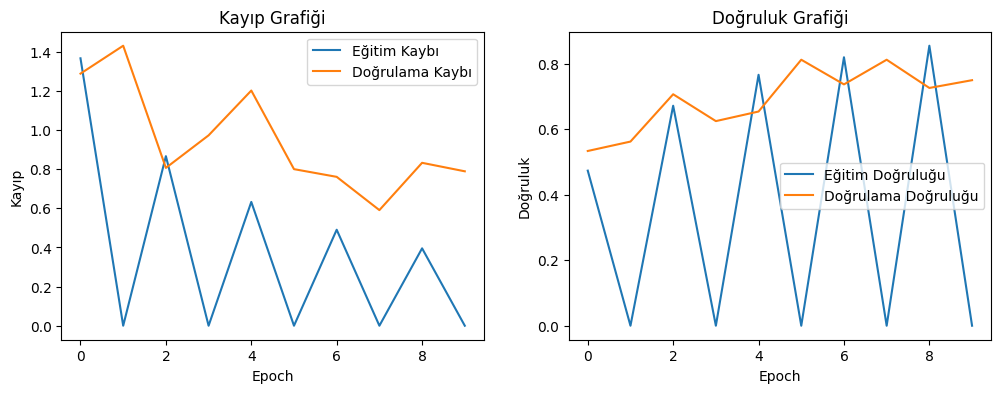

In [13]:
import matplotlib.pyplot as plt


plt.figure(figsize=(12, 4))


plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Eğitim Kaybı')
plt.plot(history.history['val_loss'], label='Doğrulama Kaybı')
plt.title('Kayıp Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Kayıp')
plt.legend()


plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Eğitim Doğruluğu')
plt.plot(history.history['val_accuracy'], label='Doğrulama Doğruluğu')
plt.title('Doğruluk Grafiği')
plt.xlabel('Epoch')
plt.ylabel('Doğruluk')
plt.legend()

plt.show()


**Modeli Kaydetme**
model.save ile model diske kayıt olmuş olur.


In [14]:
model.save('fish_classification_model.h5')


**Modelin iyileştirilmesi**
Hiperparametre Optimizasyonu:
HyperModel sınıfından türetilen MyHyperModel sınıfı, modelin mimarisini tanımlar.
ç adet Conv2D katmanı ile farklı sayılarda filtreler kullanılarak derinlik artırılır.
Her Conv2D katmanından sonra BatchNormalization eklenmiştir. Bu, modelin öğrenme sürecini hızlandırır ve kararlılığını artırır.
MaxPooling2D katmanları ile boyut küçültme yapılır.
Flatten katmanı ile veriler düzleştirilir.
Dense katmanı, hiperparametre olarak belirlenen bir sayıda düğüm içerir.
Dropout katmanı, aşırı öğrenmeyi önlemek için belirlenen bir oranla rastgele düğümleri kapatır.
Son olarak, çıkış katmanı olarak Dense katmanı ile sınıflandırma yapılır.
hp.Int, hp.Float gibi fonksiyonlar kullanılarak hiperparametreler (filtre sayısı, dropout oranı, dense katmanındaki düğüm sayısı, öğrenme oranı vb.) tanımlanır.
Bu, modelin farklı mimarilerle denemeler yapmasına olanak tanır.
RandomSearch, belirlenen sayıda deneme ile en iyi hiperparametre kombinasyonunu bulmak için kullanılır.
Max Trials: Toplamda 10 farklı kombinasyon denenecek.
Epochs: Modelin her denemesi için 10 epoch ile eğitim yapılacak.
EarlyStopping kullanılarak, doğrulama kaybı belirli bir süre boyunca iyileşmezse eğitim durdurulur ve en iyi ağırlıklar geri yüklenir.
Hiperparametre optimizasyonu tamamlandıktan sonra en iyi model alınır ve özet bilgileri yazılır.

In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from keras_tuner import HyperModel, RandomSearch

fish_dir = '/kaggle/input/a-large-scale-fish-dataset/Fish_Dataset/Fish_Dataset'


classes = [i for i in os.listdir(fish_dir) if os.path.isdir(os.path.join(fish_dir, i))]
print("Sınıflar:", classes)

img_height, img_width = 150, 150 
batch_size = 32  


train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

validation_generator = train_datagen.flow_from_directory(
    directory=fish_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()

       
        model.add(Conv2D(hp.Int('filters_1', 32, 128, step=32), (3, 3), activation='relu', input_shape=(img_height, img_width, 3)))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))


        model.add(Conv2D(hp.Int('filters_2', 32, 128, step=32), (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))

       
        model.add(Conv2D(hp.Int('filters_3', 32, 128, step=32), (3, 3), activation='relu'))
        model.add(BatchNormalization())
        model.add(MaxPooling2D(pool_size=(2, 2)))

        model.add(Flatten())

       
        model.add(Dense(hp.Int('dense_units', 128, 512, step=64), activation='relu'))
        model.add(Dropout(hp.Float('dropout_rate', 0.1, 0.5, step=0.1)))

       
        model.add(Dense(len(classes), activation='softmax'))

      
        model.compile(optimizer=Adam(learning_rate=hp.Float('learning_rate', 1e-5, 1e-2, sampling='LOG')),
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])
        return model


def optimize_hyperparameters(X, y):
    tuner = RandomSearch(
        MyHyperModel(),
        objective='val_accuracy',
        max_trials=10,
        executions_per_trial=2,
        directory='hyperparam_tuning',
        project_name='fish_classification'
    )

  
    tuner.search(train_generator,
                 epochs=10,
                 validation_data=validation_generator,
                 callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)])


    best_model = tuner.get_best_models(num_models=1)[0]
    return best_model


best_model = optimize_hyperparameters(None, None)


best_model.summary()


Sınıflar: ['Hourse Mackerel', 'Black Sea Sprat', 'Sea Bass', 'Red Mullet', 'Trout', 'Striped Red Mullet', 'Shrimp', 'Gilt-Head Bream', 'Red Sea Bream']
Found 14400 images belonging to 9 classes.
Found 3600 images belonging to 9 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Search: Running Trial #1

Value             |Best Value So Far |Hyperparameter
64                |64                |filters_1
64                |64                |filters_2
128               |128               |filters_3
384               |384               |dense_units
0.4               |0.4               |dropout_rate
4.8099e-05        |4.8099e-05        |learning_rate



/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


213/450 ━━━━━━━━━━━━━━━━━━━━ 7:54 2s/step - accuracy: 0.2216 - loss: 2.7284